In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [16]:
print(df.columns)


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [19]:
df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
                 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason'], inplace=True)
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793


In [21]:
df = df[df['Total Charges'].notna()]

df['Churn'] = df['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)
df.drop(columns=['Churn Label', 'Churn Value'], inplace=True)
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,86,3239,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,67,2701,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,86,5372,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,84,5003,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,89,5340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,45,5306,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,59,2140,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,71,5560,0
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,59,2793,0


In [23]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Churn')

In [25]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df

,Tenure Months,Monthly Charges,Churn Score,CLTV,Churn,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,...,Total Charges_8496.7,Total Charges_8529.5,Total Charges_8543.25,Total Charges_8547.15,Total Charges_8564.75,Total Charges_8594.4,Total Charges_8670.1,Total Charges_8672.45,Total Charges_8684.8,Total Charges_
0,2,53.85,86,3239,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,70.70,67,2701,1,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,8,99.65,86,5372,1,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,28,104.80,84,5003,1,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,49,103.70,89,5340,1,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,45,5306,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7039,24,84.80,59,2140,0,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7040,72,103.20,71,5560,0,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7041,11,29.60,59,2793,0,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7762 - loss: 0.4642 - val_accuracy: 0.9237 - val_loss: 0.1879
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9267 - loss: 0.1773 - val_accuracy: 0.9272 - val_loss: 0.1726
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9381 - loss: 0.1538 - val_accuracy: 0.9166 - val_loss: 0.1777
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9504 - loss: 0.1182 - val_accuracy: 0.9237 - val_loss: 0.1944
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.0979 - val_accuracy: 0.9130 - val_loss: 0.2076
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9808 - loss: 0.0555 - val_accuracy: 0.9228 - val_loss: 0.1787
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0290 - val_accuracy: 0.9193 - val_loss: 0.1870
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0181 - val_accuracy: 0.

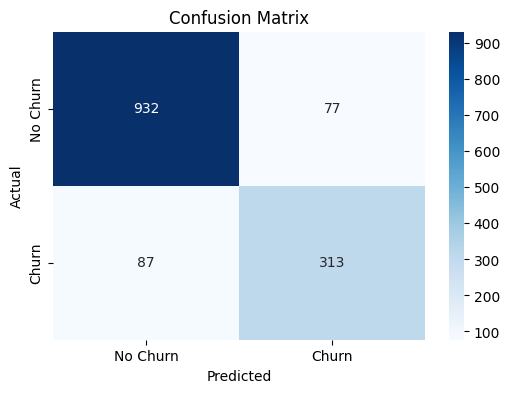

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


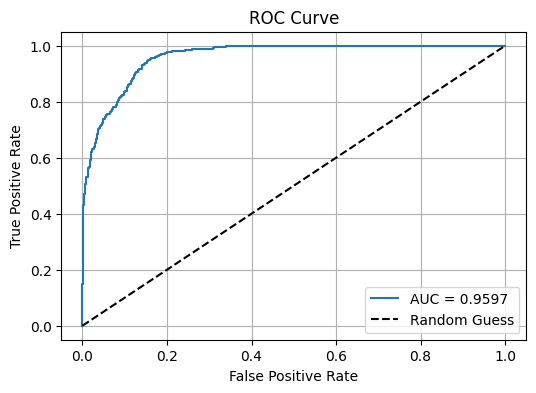

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()